In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [26]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "classOfFlower"]
iris_data = pd.read_csv(url, names = column_names)

In [27]:
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,classOfFlower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris_data.iloc[50:,2:]

,petal_length,petal_width,classOfFlower
50,4.7,1.4,Iris-versicolor
51,4.5,1.5,Iris-versicolor
52,4.9,1.5,Iris-versicolor
53,4.0,1.3,Iris-versicolor
54,4.6,1.5,Iris-versicolor
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [29]:
#iris_data.describe()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

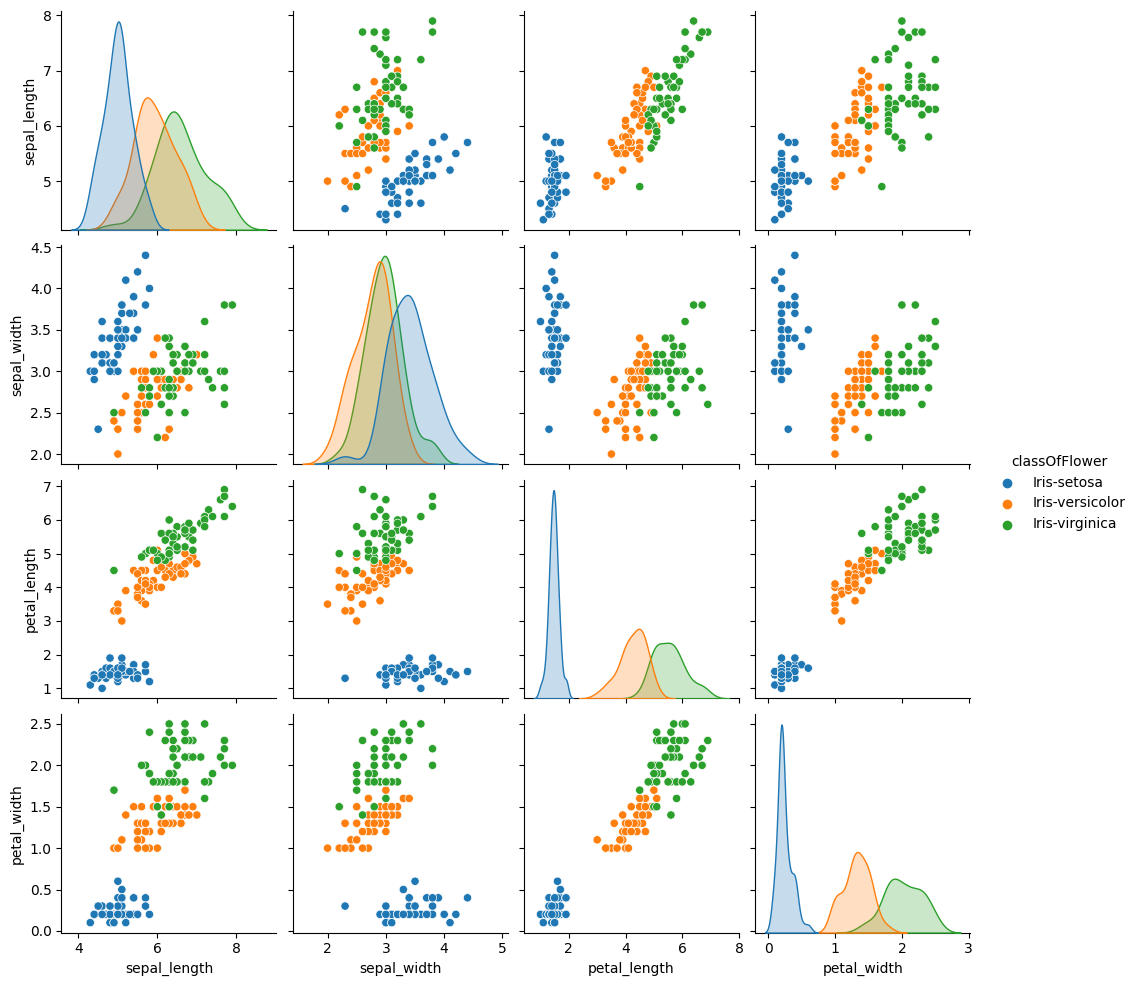

In [30]:
sns.pairplot(iris_data, hue="classOfFlower")
plt.show()

In [38]:
x = iris_data.drop("classOfFlower",axis = "columns")
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
y = iris_data["classOfFlower"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: classOfFlower, Length: 150, dtype: object

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [46]:
#X_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = knn.predict(X_test)

In [51]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [52]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [53]:
#X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [64]:
new_data = pd.DataFrame({"sepal_length":[6.7],"sepal_width":[6.5],"petal_length":3.4,"petal_width":2.9})

In [65]:
prediction = knn.predict(new_data)
prediction

array(['Iris-virginica'], dtype=object)